# 第7章: 単語ベクトル
https://nlp100.github.io/ja/ch07.html

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．


In [7]:
# !gdown https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM

In [8]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．


In [31]:
model.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．


In [3]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．


In [4]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

## 64. アナロジーデータでの実験
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．


In [11]:
# !wget http://download.tensorflow.org/data/questions-words.txt
!head questions-words.txt

with open('questions-words.txt', 'r+') as f: 
    lines = f.readlines()
    f.seek(0)
    for line in lines:
        if line[0] == ':':
            f.write(line)
            continue
        
        line = line.strip()
        words = line.split()
        word, score = model.most_similar(positive=words[1:3], negative=words[:1], topn=1)[0]
        words += [word, str(score)]
        f.write(' '.join(words)+'\n')

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.6351871490478516
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235777974128723
Athens Greece Berlin Germany Germany 0.6734622716903687
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527809739112854
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460991501808167


## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．


In [15]:
with open('questions-words.txt', 'r') as f: 
    lines = f.readlines()

count_dict = {'sem_cnt': 0, 'sem_cor': 0, 'syn_cnt': 0, 'syn_cor': 0}
category = ''
for line in lines:
    words = line.split()
    if words[0] == ':':
        category = words[1]
        continue
    if len(words) != 6:
        continue
    
    # カテゴリが意味的アナロジーの時
    if not category.startswith('gram'):
        count_dict['sem_cnt'] += 1
        if words[3] == words[4]:
            count_dict['sem_cor'] += 1
    # カテゴリが文法的アナロジーの時
    else:
        count_dict['syn_cnt'] += 1
        if words[3] == words[4]:
            count_dict['syn_cor'] += 1

print(f'semantic acc: {count_dict["sem_cor"]/count_dict["sem_cnt"]}')
print(f'syntax acc: {count_dict["syn_cor"]/count_dict["syn_cnt"]}')

semantic acc: 0.7296127562642369
syntax acc: 0.7400468384074942


## 66. WordSimilarity-353での評価
[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．


In [3]:
# !wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
# !unzip wordsim353.zip -d wordsim353
# !rm wordsim353.zip
!head ./wordsim353/combined.csv

import pandas as pd
df = pd.read_csv('./wordsim353/combined.csv')
df['similarity'] = df.apply(lambda row: model.similarity(row['Word 1'], row['Word 2']), axis=1)
spearman_corr = df[['Human (mean)', 'similarity']].corr(method='spearman')
print(f'spearman corr: {spearman_corr}')

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50
spearman corr:               Human (mean)  similarity
Human (mean)      1.000000    0.700017
similarity        0.700017    1.000000


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．


In [7]:
# !wget https://datahub.io/core/country-list/r/data.csv

from sklearn.cluster import KMeans
import numpy as np

df_country = pd.read_csv('data.csv')

countries = [country for country in df_country['Name'].tolist() if country in model]
countries_vec = [model[country] for country in countries]

kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print(f'cluster: {i}')
    print(', '.join([countries[k] for k in cluster]))

cluster: 0
Anguilla, Aruba, Bahamas, Barbados, Belize, Bermuda, Colombia, Cuba, Curaçao, Dominica, Ecuador, Grenada, Guadeloupe, Guam, Guatemala, Guyana, Haiti, Honduras, Jamaica, Martinique, Mexico, Montserrat, Nicaragua, Panama, Peru, Philippines, Pitcairn, Suriname
cluster: 1
Algeria, Angola, Benin, Botswana, Burundi, Cameroon, Chad, Congo, Djibouti, Egypt, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Somalia, Sudan, Swaziland, Togo, Tunisia, Uganda, Yemen, Zambia, Zimbabwe
cluster: 2
Comoros, Fiji, Kiribati, Maldives, Mauritius, Mayotte, Nauru, Niue, Palau, Réunion, Samoa, Seychelles, Tokelau, Tonga, Tuvalu, Vanuatu
cluster: 3
Albania, Andorra, Antarctica, Argentina, Australia, Austria, Belgium, Brazil, Bulgaria, Canada, Chile, Croatia, Cyprus, Denmark, Estonia, Finland, France, Germany, Gibraltar, Greece, Greenland, Guernsey, Hungary, Iceland, Ir

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．


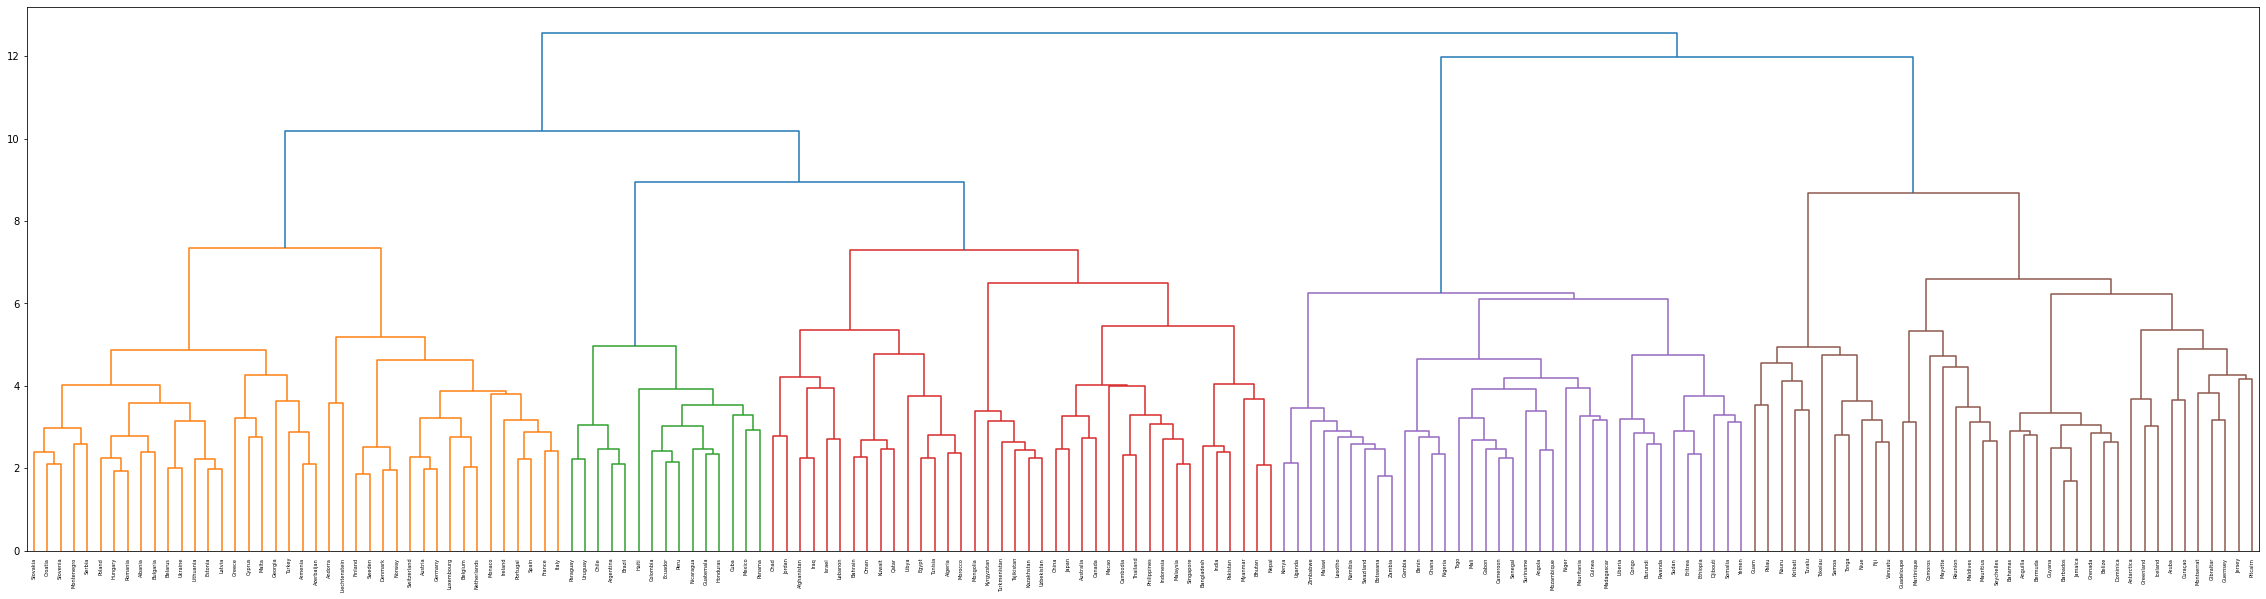

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(40, 10))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


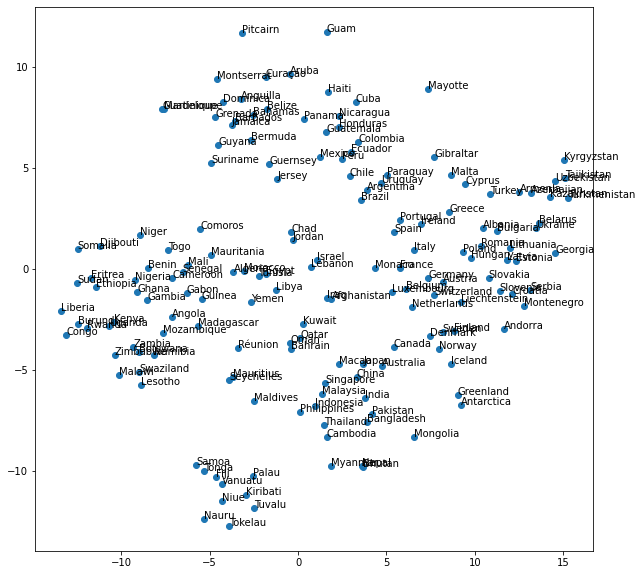

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE()
embs_vec = tsne.fit_transform(countries_vec)
embs_vec = np.array(embs_vec).T

plt.figure(figsize=(10, 10))
plt.scatter(embs_vec[0], embs_vec[1])
for (x, y), name in zip(embs_vec.T, countries):
    plt.annotate(name, (x, y))
plt.show()